In [1]:
import os 
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.cm as cm
import function_plot as f_plt

In [2]:
mock_dir=os.getenv('HOME')+'/Desktop/TESI/models/Sandage_varZ_v4.1eq_bc03MILES_ChFall/mock_ER_001/'
models_dir=os.getenv('HOME')+'/Desktop/TESI/models/Sandage_varZ_v4.1eq_bc03MILES_ChFall/'
phpars_to_fit=['mstar','mstar_form','agewr','agelgwr','agewm','agelgwm','agewmf','agelgwmf','zstarwr','zstarwm','zstarwmf','zstarlgwmf','zstarlgwr','zstarlgwm','Ag','Ai','mtoli','age10','age50','age90','dage_10_90', 'dage_25_75', 'dage_50_90', 'dage_10_50']
n_par=np.size(phpars_to_fit)

In [3]:
file_par_ld=models_dir+'sandage_varZ_v4.1eq_spec_dcomb090n_001_physpar_wagef.fits'
file_idx_ld=models_dir+'sandage_varZ_v4.1eq_spec_dcomb090n_idx_001.fits'
file_pert=mock_dir+'sandage_varZ_v4.1eq_spec_dcomb_perterr_001.fits'
file_models=models_dir+'sandage_varZ_v4.1eq.fits'

hdul_models=fits.open(file_models)

hdul_par_ld=fits.open(file_par_ld)
hdul_idx_ld=fits.open(file_idx_ld)
hdul_pert=fits.open(file_pert)

sigma_D4000n=hdul_pert[1].data['D4000N_ERR_SNR020']
sigma_hdhg=hdul_pert[1].data['HDHG_ERR_SNR020']
sigma_Hb=hdul_pert[1].data['LICK_HB_ERR_SNR020']
sigma_mgfep=hdul_pert[1].data['MGFE_PRIME_ERR_SNR020']
sigma_mg2fe=hdul_pert[1].data['MG2FE_ERR_SNR020']

sigma_u=hdul_pert[1].data['ERR_MAG_U']
sigma_g=hdul_pert[1].data['ERR_MAG_G']
sigma_r=hdul_pert[1].data['ERR_MAG_R']
sigma_i=hdul_pert[1].data['ERR_MAG_I']
sigma_z=hdul_pert[1].data['ERR_MAG_Z']

hdhg_ld=hdul_idx_ld[1].data['HdHg'][...,4]
D4000n_ld=hdul_idx_ld[1].data['D4000N'][...,4]
Hb_ld=hdul_idx_ld[1].data['Lick_HB'][...,4]              #['D4000n','Lick_HB','HdHg','MgFe_prime','Mg2Fe']
MgFeP_ld=hdul_idx_ld[1].data['MgFe_prime'][...,4] 
Mg2Fe_ld=hdul_idx_ld[1].data['Mg2Fe'][...,4] 

mag_u_ld=hdul_par_ld[1].data['ABMAG'][...,0]
mag_g_ld=hdul_par_ld[1].data['ABMAG'][...,1]
mag_r_ld=hdul_par_ld[1].data['ABMAG'][...,2]
mag_i_ld=hdul_par_ld[1].data['ABMAG'][...,3]
mag_z_ld=hdul_par_ld[1].data['ABMAG'][...,4]

age10_ld=hdul_par_ld[1].data['age10']
age50_ld=hdul_par_ld[1].data['age50']
age90_ld=hdul_par_ld[1].data['age90']

mfwz_ld=hdul_par_ld[1].data['MFORMW_Z']

N_bursts=hdul_models[1].data['NBURST']


In [4]:
n_chunks=40
for i in range(2,n_chunks+1):
    file_par_ld=models_dir+'sandage_varZ_v4.1eq_spec_dcomb090n_{:03d}_physpar_wagef.fits'
    file_idx_ld=models_dir+'sandage_varZ_v4.1eq_spec_dcomb090n_idx_{:03d}.fits'
    file_pert=mock_dir+'sandage_varZ_v4.1eq_spec_dcomb_perterr_001.fits'

    hdul_par_ld=fits.open(file_par_ld.format(i))
    hdul_idx_ld=fits.open(file_idx_ld.format(i))
    hdul_pert=fits.open(file_pert.format(i))
    
    _sigma_D4000n=hdul_pert[1].data['D4000N_ERR_SNR020']
    _sigma_hdhg=hdul_pert[1].data['HDHG_ERR_SNR020']
    _sigma_Hb=hdul_pert[1].data['LICK_HB_ERR_SNR020']
    _sigma_mgfep=hdul_pert[1].data['MGFE_PRIME_ERR_SNR020']
    _sigma_mg2fe=hdul_pert[1].data['MG2FE_ERR_SNR020']
    
    _sigma_u=hdul_pert[1].data['ERR_MAG_U']
    _sigma_g=hdul_pert[1].data['ERR_MAG_G']
    _sigma_r=hdul_pert[1].data['ERR_MAG_R']
    _sigma_i=hdul_pert[1].data['ERR_MAG_I']
    _sigma_z=hdul_pert[1].data['ERR_MAG_Z']


    _hdhg_ld=hdul_idx_ld[1].data['HdHg'][...,4]
    _D4000n_ld=hdul_idx_ld[1].data['D4000N'][...,4]
    _Hb_ld=hdul_idx_ld[1].data['Lick_HB'][...,4]              #['D4000n','Lick_HB','HdHg','MgFe_prime','Mg2Fe']
    _MgFeP_ld=hdul_idx_ld[1].data['MgFe_prime'][...,4] 
    _Mg2Fe_ld=hdul_idx_ld[1].data['Mg2Fe'][...,4] 
    
    _mag_u_ld=hdul_par_ld[1].data['ABMAG'][...,0]
    _mag_g_ld=hdul_par_ld[1].data['ABMAG'][...,1]
    _mag_r_ld=hdul_par_ld[1].data['ABMAG'][...,2]
    _mag_i_ld=hdul_par_ld[1].data['ABMAG'][...,3]
    _mag_z_ld=hdul_par_ld[1].data['ABMAG'][...,4]

    
    _age10_ld=hdul_par_ld[1].data['age10']
    _age50_ld=hdul_par_ld[1].data['age50']
    _age90_ld=hdul_par_ld[1].data['age90']
    
    _mfwz_ld=hdul_par_ld[1].data['MFORMW_Z']
    
    sigma_D4000n=np.append(sigma_D4000n, _sigma_D4000n)
    sigma_hdhg=np.append(sigma_hdhg, _sigma_hdhg)
    sigma_Hb=np.append(sigma_Hb, _sigma_Hb)
    sigma_mgfep=np.append(sigma_mgfep, _sigma_mgfep)
    sigma_mg2fe=np.append(sigma_mg2fe, _sigma_mg2fe)
    
    sigma_u=np.append(sigma_u, _sigma_u)
    sigma_g=np.append(sigma_g, _sigma_g)
    sigma_r=np.append(sigma_r, _sigma_r)
    sigma_i=np.append(sigma_i, _sigma_i)
    sigma_z=np.append(sigma_z, _sigma_z)
    
    hdhg_ld=np.append(hdhg_ld, _hdhg_ld)
    D4000n_ld=np.append(D4000n_ld, _D4000n_ld)
    Hb_ld=np.append(Hb_ld, _Hb_ld)
    MgFeP_ld=np.append(MgFeP_ld, _MgFeP_ld)
    Mg2Fe_ld=np.append(Mg2Fe_ld, _Mg2Fe_ld)
    age10_ld=np.append(age10_ld, _age10_ld)
    age50_ld=np.append(age50_ld, _age50_ld)
    age90_ld=np.append(age90_ld, _age90_ld)
    mfwz_ld=np.append(mfwz_ld, _mfwz_ld)
    
    mag_u_ld=np.append(mag_u_ld, _mag_u_ld)
    mag_g_ld=np.append(mag_g_ld, _mag_g_ld)
    mag_r_ld=np.append(mag_r_ld, _mag_r_ld)
    mag_i_ld=np.append(mag_i_ld, _mag_i_ld)
    mag_z_ld=np.append(mag_z_ld, _mag_z_ld)
    

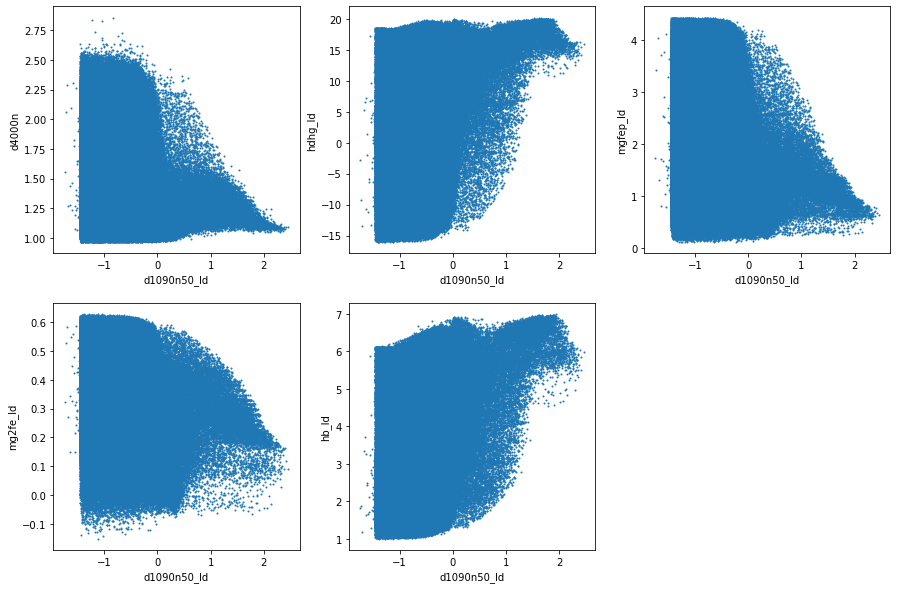

In [5]:
d1090n50_ld=np.log10(age10_ld-age90_ld)-np.log10(age50_ld)
fig_res_tot=f_plt.idx_resol(d1090n50_ld,D4000n_ld,hdhg_ld, MgFeP_ld, Mg2Fe_ld, Hb_ld, par_name='d1090n50_ld', idx_name=['d4000n', 'hdhg_ld', 'mgfep_ld', 'mg2fe_ld', 'hb_ld'], figsize=(15,10))

In [6]:
idx_age50_95=np.where((np.log10(age50_ld) < 9.5) & (np.log10(age50_ld) >9.0))[0]

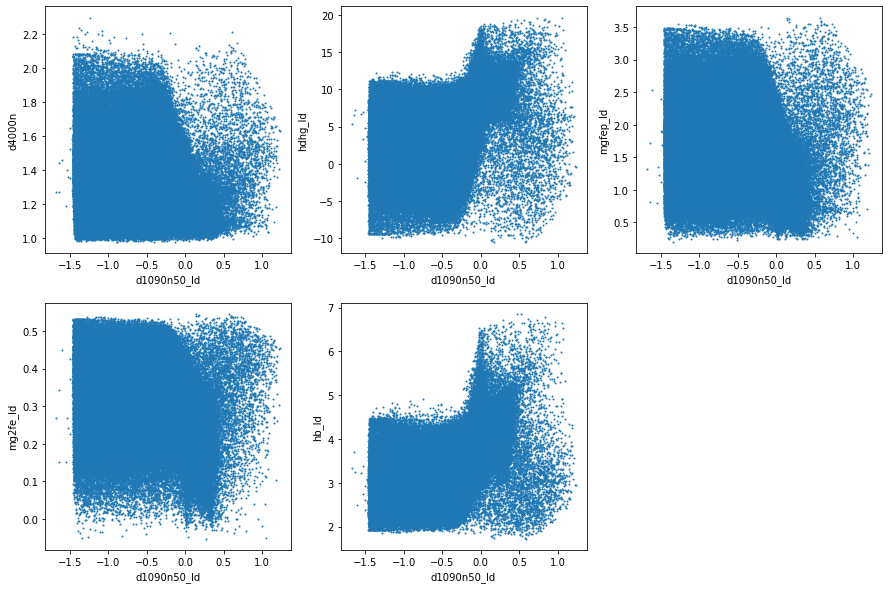

In [7]:
fig_resol_age=f_plt.idx_resol(d1090n50_ld[idx_age50_95],D4000n_ld[idx_age50_95],hdhg_ld[idx_age50_95], MgFeP_ld[idx_age50_95], Mg2Fe_ld[idx_age50_95], Hb_ld[idx_age50_95], par_name='d1090n50_ld', idx_name=['d4000n', 'hdhg_ld', 'mgfep_ld', 'mg2fe_ld', 'hb_ld'], figsize=(15,10))

In [8]:
idx_age50_95_z01=np.where((np.log10(age50_ld) < 9.5) & (np.log10(age50_ld) >9.0) & (abs(mfwz_ld)<0.1))[0]


idx_9095_z01nb=np.where((np.log10(age50_ld) < 9.5) & (np.log10(age50_ld) >9.0) & (abs(mfwz_ld)<0.1) & (N_bursts==0))[0]
idx_90_z01nb=np.where((np.log10(age50_ld) < 9.0) & (abs(mfwz_ld)<0.1) & (N_bursts==0))[0]
idx_95_z01nb=np.where((np.log10(age50_ld) >9.5) & (abs(mfwz_ld)<0.1) & (N_bursts==0))[0]


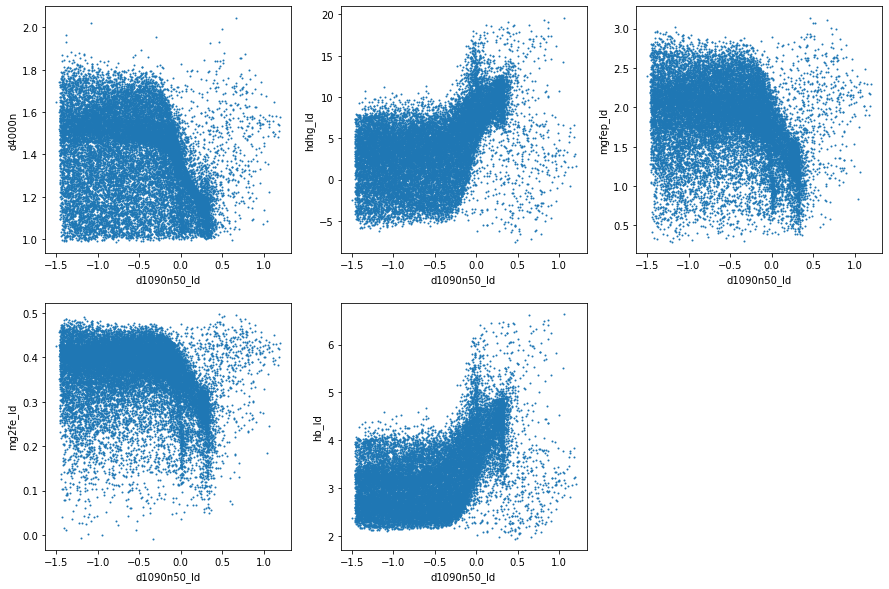

In [9]:
fig_resol_age=f_plt.idx_resol(d1090n50_ld[idx_age50_95_z01],D4000n_ld[idx_age50_95_z01],hdhg_ld[idx_age50_95_z01], MgFeP_ld[idx_age50_95_z01], Mg2Fe_ld[idx_age50_95_z01], Hb_ld[idx_age50_95_z01], par_name='d1090n50_ld', idx_name=['d4000n', 'hdhg_ld', 'mgfep_ld', 'mg2fe_ld', 'hb_ld'], figsize=(15,10))

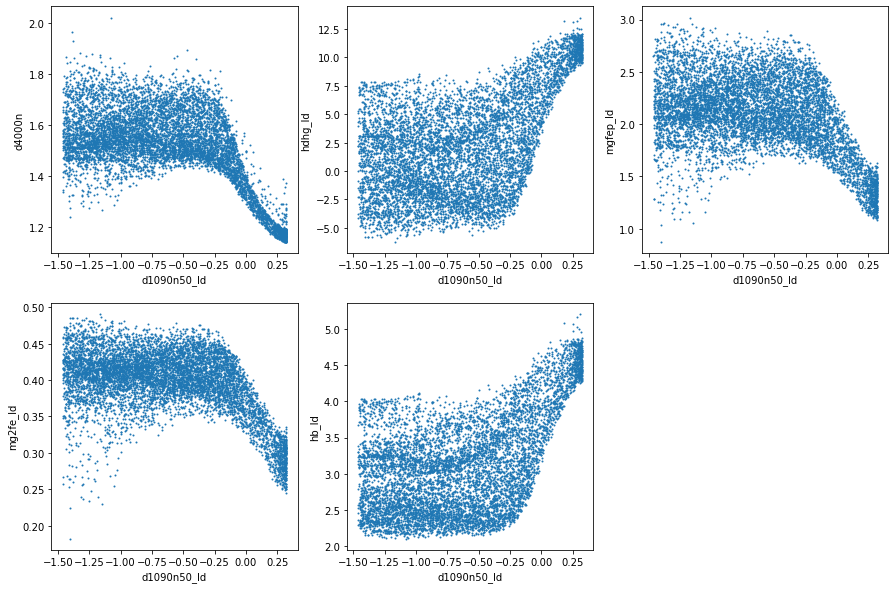

In [10]:
fig_resol_agenb=f_plt.idx_resol(d1090n50_ld[idx_9095_z01nb],D4000n_ld[idx_9095_z01nb],hdhg_ld[idx_9095_z01nb], MgFeP_ld[idx_9095_z01nb], Mg2Fe_ld[idx_9095_z01nb], Hb_ld[idx_9095_z01nb], par_name='d1090n50_ld', idx_name=['d4000n', 'hdhg_ld', 'mgfep_ld', 'mg2fe_ld', 'hb_ld'], figsize=(15,10))

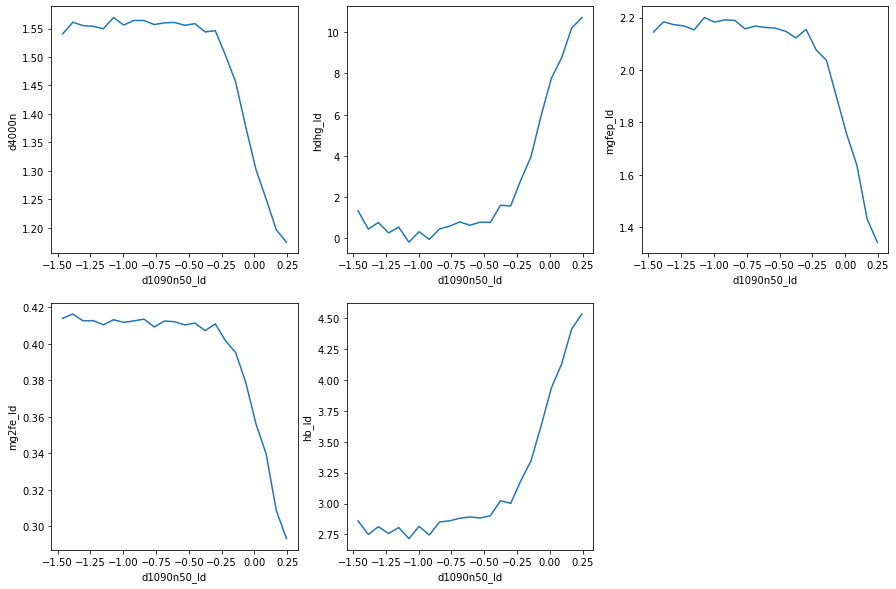

In [11]:
fig_restat_zagenb=f_plt.idx_resol_stat(d1090n50_ld[idx_9095_z01nb],D4000n_ld[idx_9095_z01nb],hdhg_ld[idx_9095_z01nb], MgFeP_ld[idx_9095_z01nb], Mg2Fe_ld[idx_9095_z01nb], Hb_ld[idx_9095_z01nb], par_name='d1090n50_ld', idx_name=['d4000n', 'hdhg_ld', 'mgfep_ld', 'mg2fe_ld', 'hb_ld'],bins=23, figsize=(15,10))

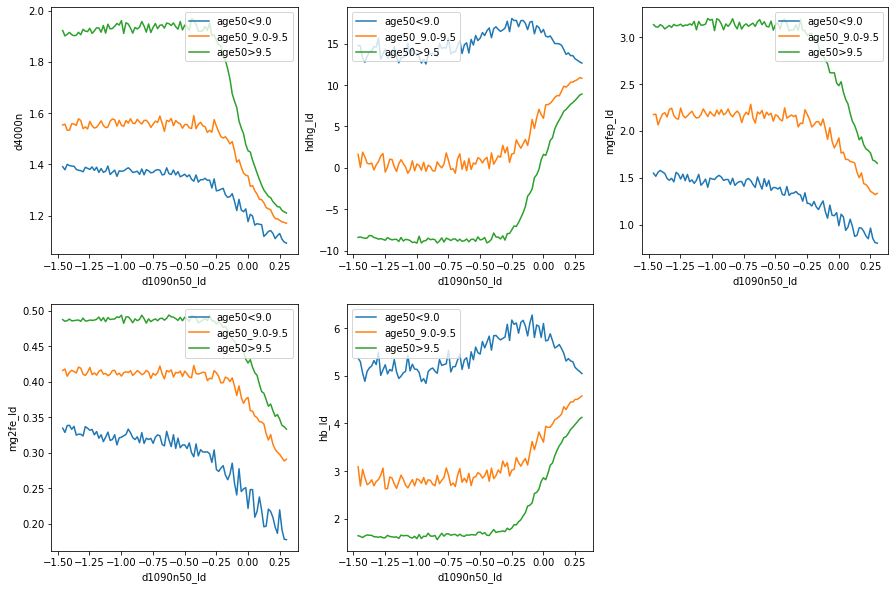

In [12]:
fig_resol3_idx=f_plt.idx_resol_stat4(d1090n50_ld,idx_90_z01nb,idx_9095_z01nb,idx_95_z01nb,D4000n_ld,hdhg_ld, MgFeP_ld, Mg2Fe_ld, Hb_ld, x_name='d1090n50_ld',par_name=['','age50<9.0','age50_9.0-9.5','age50>9.5'], idx_name=['d4000n', 'hdhg_ld', 'mgfep_ld', 'mg2fe_ld', 'hb_ld'],bins=100, figsize=(15,10))

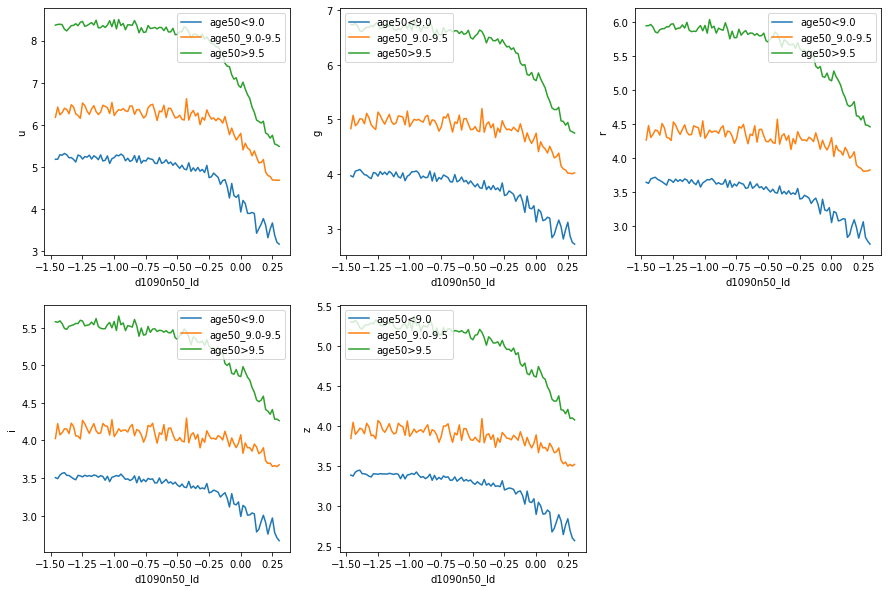

In [13]:
fig_resol3_idx=f_plt.idx_resol_stat4(d1090n50_ld,idx_90_z01nb,idx_9095_z01nb,idx_95_z01nb,mag_u_ld,mag_g_ld, mag_r_ld, mag_i_ld, mag_z_ld, x_name='d1090n50_ld',par_name=['','age50<9.0','age50_9.0-9.5','age50>9.5'], idx_name=['u', 'g', 'r', 'i', 'z'],bins=100, figsize=(15,10))

In [14]:
idx_ref_obs=np.where((d1090n50_ld<-0.75) & (N_bursts==0) & (abs(mfwz_ld)<0.1) )[0]
idx_nb_z=np.where((N_bursts==0) & (abs(mfwz_ld)<0.1) )[0]
#idx_low075=np.where(d1090n50_ldnb<-0.75)[0]

In [15]:
D4000n_ldnb=D4000n_ld[idx_nb_z]
hdhg_ldnb=hdhg_ld[idx_nb_z]
Hb_ldnb=Hb_ld[idx_nb_z]
MgFeP_ldnb=MgFeP_ld[idx_nb_z]
Mg2Fe_ldnb=Mg2Fe_ld[idx_nb_z]
d1090n50_ldnb=d1090n50_ld[idx_nb_z]

mag_u_ldnb=mag_u_ld[idx_nb_z]
mag_g_ldnb=mag_g_ld[idx_nb_z]
mag_r_ldnb=mag_r_ld[idx_nb_z]
mag_i_ldnb=mag_i_ld[idx_nb_z]
mag_z_ldnb=mag_z_ld[idx_nb_z]

In [16]:
D4000n_ref=np.median(D4000n_ld[idx_ref_obs])
hdhg_ref=np.median(hdhg_ld[idx_ref_obs])
hb_ref=np.median(Hb_ld[idx_ref_obs])
mgfep_ref=np.median(MgFeP_ld[idx_ref_obs])
mg2fe_ref=np.median(Mg2Fe_ld[idx_obs])

u_ref=np.median(mag_u_ld[idx_ref_obs])
g_ref=np.median(mag_g_ld[idx_ref_obs])
r_ref=np.median(mag_r_ld[idx_ref_obs])
i_ref=np.median(mag_i_ld[idx_ref_obs])
z_ref=np.median(mag_z_ld[idx_ref_obs])

In [26]:
sigma_D4000nref=f_plt.perc_84(D4000n_ld[idx_ref_obs])-f_plt.perc_16(D4000n_ld[idx_ref_obs])
sigma_hdhgref=f_plt.perc_84(hdhg_ld[idx_ref_obs])-f_plt.perc_16(hdhg_ld[idx_ref_obs])
sigma_Hbref=f_plt.perc_84(Hb_ld[idx_ref_obs])-f_plt.perc_16(Hb_ld[idx_ref_obs])
sigma_mg2feref=f_plt.perc_84(Mg2Fe_ld[idx_ref_obs])-f_plt.perc_16(Mg2Fe_ld[idx_ref_obs])
sigma_mgfepref=f_plt.perc_84(MgFeP_ld[idx_ref_obs])-f_plt.perc_16(MgFeP_ld[idx_ref_obs])

sigma_uref=f_plt.perc_84(mag_u_ld[idx_ref_obs])-f_plt.perc_16(mag_u_ld[idx_ref_obs])
sigma_gref=f_plt.perc_84(mag_g_ld[idx_ref_obs])-f_plt.perc_16(mag_g_ld[idx_ref_obs])
sigma_rref=f_plt.perc_84(mag_r_ld[idx_ref_obs])-f_plt.perc_16(mag_r_ld[idx_ref_obs])
sigma_iref=f_plt.perc_84(mag_i_ld[idx_ref_obs])-f_plt.perc_16(mag_i_ld[idx_ref_obs])
sigma_zref=f_plt.perc_84(mag_z_ld[idx_ref_obs])-f_plt.perc_16(mag_z_ld[idx_ref_obs])


In [37]:
chi_q_idx=((D4000n_ldnb-D4000n_ref)/sigma_D4000nref)**2+((hdhg_ldnb-hdhg_ref)/sigma_hdhgref)**2+((Hb_ldnb-hb_ref)/sigma_Hbref)**2+((Mg2Fe_ldnb-mg2fe_ref)/sigma_mg2feref)**2+((MgFeP_ldnb-mgfep_ref)/sigma_mgfepref)**2
chi_q_mag=((mag_u_ldnb-u_ref)/sigma_uref)**2+((mag_g_ldnb-g_ref)/sigma_gref)**2+((mag_r_ldnb-r_ref)/sigma_rref)**2+((mag_i_ldnb-i_ref)/sigma_iref)**2+((mag_z_ldnb-z_ref)/sigma_zref)**2
chi_q=chi_q_idx+chi_q_mag

sigma_chi_idx=np.sqrt(sigma_D4000nref**2+sigma_hdhgref**2+sigma_Hbref**2+sigma_mg2feref**2+sigma_mgfepref**2)
sigma_chi_mag=np.sqrt(sigma_uref**2+sigma_gref**2+sigma_rref**2+sigma_iref**2+sigma_zref**2)
sigma_chi=np.sqrt(sigma_chi_idx**2+sigma_chi_mag**2)

In [40]:
median_chi_idx=stats.binned_statistic(d1090n50_ldnb, chi_q_idx, statistic='median', bins=50)
chi_16_idx=stats.binned_statistic(d1090n50_ldnb, chi_q_idx, statistic=f_plt.perc_16, bins=50)
chi_84_idx=stats.binned_statistic(d1090n50_ldnb, chi_q_idx, statistic=f_plt.perc_84, bins=50)

median_chi_mag=stats.binned_statistic(d1090n50_ldnb, chi_q_mag, statistic='median', bins=50)
chi_16_mag=stats.binned_statistic(d1090n50_ldnb, chi_q_mag, statistic=f_plt.perc_16, bins=50)
chi_84_mag=stats.binned_statistic(d1090n50_ldnb, chi_q_mag, statistic=f_plt.perc_84, bins=50)

median_chi=stats.binned_statistic(d1090n50_ldnb, chi_q, statistic='median', bins=50)
chi_16=stats.binned_statistic(d1090n50_ldnb, chi_q, statistic=f_plt.perc_16, bins=50)
chi_84=stats.binned_statistic(d1090n50_ldnb, chi_q, statistic=f_plt.perc_84, bins=50)

In [47]:
idx_ref_chi=np.where(d1090n50_ldnb<-0.75)[0]
median_chi_ref=np.median(chi_q[idx_ref_chi])
p84_chi_ref=f_plt.perc_84(chi_q[idx_ref_chi])
p16_chi_ref=f_plt.perc_16(chi_q[idx_ref_chi])

median_chi_ref_idx=np.median(chi_q_idx[idx_ref_chi])
p84_chi_ref_idx=f_plt.perc_84(chi_q_idx[idx_ref_chi])
p16_chi_ref_idx=f_plt.perc_16(chi_q_idx[idx_ref_chi])

median_chi_ref_mag=np.median(chi_q_mag[idx_ref_chi])
p84_chi_ref_mag=f_plt.perc_84(chi_q_mag[idx_ref_chi])
p16_chi_ref_mag=f_plt.perc_16(chi_q_mag[idx_ref_chi])

Text(0, 0.5, 'chi_q')

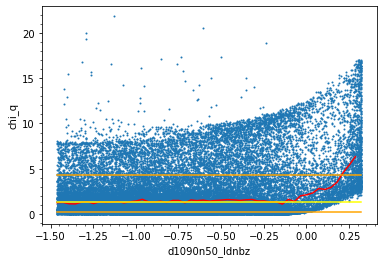

In [48]:
plt.scatter(d1090n50_ldnb,(chi_q),s=1)
plt.plot(median_chi.bin_edges[:-1], (median_chi.statistic), color='red')
plt.plot([np.min(d1090n50_ldnb), np.max(d1090n50_ldnb)], [median_chi_ref, median_chi_ref], color='yellow')
plt.plot([np.min(d1090n50_ldnb), np.max(d1090n50_ldnb)], [p84_chi_ref, p84_chi_ref],color='orange')
plt.plot([np.min(d1090n50_ldnb), np.max(d1090n50_ldnb)],[p16_chi_ref,p16_chi_ref], color='orange')

plt.minorticks_on()
plt.xlabel('d1090n50_ldnbz')
plt.ylabel('chi_q')

Text(0, 0.5, 'chi_q_idx')

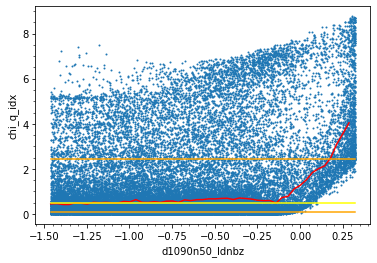

In [49]:
plt.scatter(d1090n50_ldnb,(chi_q_idx),s=1)
plt.plot(median_chi_idx.bin_edges[:-1], (median_chi_idx.statistic), color='red')
plt.plot([np.min(d1090n50_ldnb), np.max(d1090n50_ldnb)], [median_chi_ref_idx, median_chi_ref_idx], color='yellow')
plt.plot([np.min(d1090n50_ldnb), np.max(d1090n50_ldnb)], [p84_chi_ref_idx, p84_chi_ref_idx],color='orange')
plt.plot([np.min(d1090n50_ldnb), np.max(d1090n50_ldnb)],[p16_chi_ref_idx,p16_chi_ref_idx], color='orange')


plt.minorticks_on()
plt.xlabel('d1090n50_ldnbz')
plt.ylabel('chi_q_idx')

Text(0, 0.5, 'chi_q_mag')

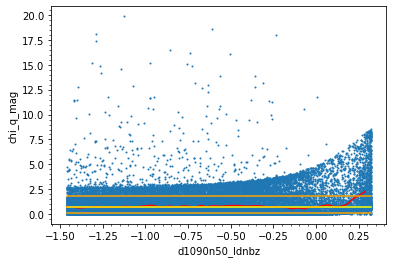

In [50]:
plt.scatter(d1090n50_ldnb,(chi_q_mag),s=1)
plt.plot(median_chi_mag.bin_edges[:-1], (median_chi_mag.statistic), color='red')
plt.plot([np.min(d1090n50_ldnb), np.max(d1090n50_ldnb)], [median_chi_ref_mag, median_chi_ref_mag], color='yellow')
plt.plot([np.min(d1090n50_ldnb), np.max(d1090n50_ldnb)], [p84_chi_ref_mag, p84_chi_ref_mag],color='orange')
plt.plot([np.min(d1090n50_ldnb), np.max(d1090n50_ldnb)],[p16_chi_ref_mag,p16_chi_ref_mag], color='orange')


plt.minorticks_on()
plt.xlabel('d1090n50_ldnbz')
plt.ylabel('chi_q_mag')